## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from warnings import filterwarnings
filterwarnings(action='ignore')

## Loading Dataset

In [2]:
df=pd.read_excel(r'C:\Users\User\Documents\Projects\ML Projects\NHL Games Prediction\game_teams_stats.xlsx')
print("Successfully Imported Data!")
df

Successfully Imported Data!


,game_id,team_id,HoA,settled_in,head_coach,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,goals,won
0,2016020045,4,away,REG,Dave Hakstol,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,4.0,False
1,2016020045,16,home,REG,Joel Quenneville,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,7.0,True
2,2017020812,24,away,OT,Randy Carlyle,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,4.0,True
3,2017020812,7,home,OT,Phil Housley,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right,3.0,False
4,2015020314,21,away,REG,Patrick Roy,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52605,2018030416,19,home,REG,Craig Berube,29.0,29.0,20.0,4.0,0.0,58.7,12.0,11.0,9.0,right,1.0,False
52606,2018030417,19,away,REG,Craig Berube,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,right,4.0,True
52607,2018030417,6,home,REG,Bruce Cassidy,33.0,28.0,0.0,1.0,0.0,51.0,13.0,6.0,7.0,right,1.0,False
52608,2018030417,19,away,REG,Craig Berube,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,right,4.0,True


## Data Profiling

### Shape of the dataset

In [3]:
print(df.shape)

(52610, 17)


## Description

### Statistical summary of data

In [4]:
df.describe()

,game_id,team_id,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,goals
count,5.261000e+04,52610.000000,52602.000000,47682.000000,52602.000000,52602.000000,52602.000000,30462.000000,47682.000000,47682.000000,47682.000000,52602.000000
mean,2.010765e+09,16.880403,29.930744,21.127449,11.754838,3.693567,0.667674,49.967179,8.832977,6.745040,13.317352,2.781282
std,6.073510e+06,11.195171,6.896107,9.237332,9.029566,1.870606,0.813093,7.326322,5.478274,4.144502,5.581261,1.657257
min,2.000020e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.006020e+09,8.000000,25.000000,15.000000,6.000000,2.000000,0.000000,45.200000,5.000000,4.000000,10.000000,2.000000
50%,2.011021e+09,16.000000,30.000000,20.000000,10.000000,3.000000,0.000000,50.000000,8.000000,6.000000,13.000000,3.000000
75%,2.016030e+09,24.000000,34.000000,27.000000,15.000000,5.000000,1.000000,54.800000,12.000000,9.000000,17.000000,4.000000
max,2.019041e+09,90.000000,88.000000,80.000000,213.000000,16.000000,7.000000,79.200000,52.000000,40.000000,62.000000,12.000000


### Feature information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   settled_in              52610 non-null  object 
 4   head_coach              52582 non-null  object 
 5   shots                   52602 non-null  float64
 6   hits                    47682 non-null  float64
 7   pim                     52602 non-null  float64
 8   powerPlayOpportunities  52602 non-null  float64
 9   powerPlayGoals          52602 non-null  float64
 10  faceOffWinPercentage    30462 non-null  float64
 11  giveaways               47682 non-null  float64
 12  takeaways               47682 non-null  float64
 13  blocked                 47682 non-null  float64
 14  startRinkSide           50218 non-null

## Structure of the Dataset

In [6]:
df_shape = df.shape
print("The credit rating dataset has", df_shape[0], "records, each with", df_shape[1],"attributes")

The credit rating dataset has 52610 records, each with 17 attributes


## Finding Null Values

In [7]:
print(df.isna().sum())

game_id                       0
team_id                       0
HoA                           0
settled_in                    0
head_coach                   28
shots                         8
hits                       4928
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
giveaways                  4928
takeaways                  4928
blocked                    4928
startRinkSide              2392
goals                         8
won                           0
dtype: int64


In [8]:
df.corr()

,game_id,team_id,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,goals,won
game_id,1.000000,0.122000,0.154728,0.342978,-0.282431,-0.344502,-0.092124,-0.001894,0.133770,0.145461,0.278443,0.037271,0.035644
team_id,0.122000,1.000000,-0.019162,0.011246,-0.044171,-0.032043,-0.014289,0.009204,-0.028017,-0.002926,-0.005821,-0.007874,-0.001185
shots,0.154728,-0.019162,1.000000,0.050009,-0.082409,0.120679,0.083634,0.138162,0.048839,0.099960,-0.074203,0.150048,0.025200
hits,0.342978,0.011246,0.050009,1.000000,-0.062390,-0.187209,-0.073287,0.003448,0.202028,0.165264,0.291648,-0.064944,-0.039339
pim,-0.282431,-0.044171,-0.082409,-0.062390,1.000000,0.290575,0.125317,-0.008737,-0.067719,-0.068962,-0.063378,0.038303,-0.040231
powerPlayOpportunities,-0.344502,-0.032043,0.120679,-0.187209,0.290575,1.000000,0.416477,0.045209,-0.011836,-0.059365,-0.163430,0.097074,0.014049
powerPlayGoals,-0.092124,-0.014289,0.083634,-0.073287,0.125317,0.416477,1.000000,0.024791,-0.001385,0.014879,0.008025,0.459827,0.240823
faceOffWinPercentage,-0.001894,0.009204,0.138162,0.003448,-0.008737,0.045209,0.024791,1.000000,0.068740,0.059343,-0.080402,0.035202,0.030458
giveaways,0.133770,-0.028017,0.048839,0.202028,-0.067719,-0.011836,-0.001385,0.068740,1.000000,0.337996,0.226224,0.012130,-0.004803
takeaways,0.145461,-0.002926,0.099960,0.165264,-0.068962,-0.059365,0.014879,0.059343,0.337996,1.000000,0.225506,0.095462,0.104937


In [9]:
df.groupby('goals').mean()

,game_id,team_id,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,won
goals,,,,,,,,,,,,
0.0,2.010434e+09,16.987865,27.691708,21.739566,12.552153,3.445536,0.000000,49.163150,8.582336,5.827564,12.000000,0.014158
1.0,2.010596e+09,16.892099,28.877653,21.719287,11.584843,3.535393,0.266474,49.801727,8.813022,6.337592,12.561916,0.117569
2.0,2.010567e+09,17.077462,29.700904,21.434048,11.389672,3.612365,0.508349,49.825515,8.790977,6.558177,13.097279,0.303820
3.0,2.010742e+09,16.724111,30.118566,21.127722,11.253289,3.680939,0.733734,50.120601,8.895315,6.872376,13.672240,0.573320
4.0,2.010988e+09,16.879592,30.428823,21.046995,11.685366,3.756015,0.921371,50.100239,8.811633,7.044171,13.917951,0.798263
5.0,2.011196e+09,16.962902,31.091412,20.182084,12.298217,3.896700,1.130560,50.265117,8.941706,7.357866,14.056043,0.915556
6.0,2.011026e+09,16.205091,32.000480,19.583377,13.474544,4.235351,1.434198,50.366862,9.025410,7.408152,13.848068,0.966378
7.0,2.011734e+09,16.629482,33.188579,19.047143,13.997344,4.317397,1.614874,50.832627,8.914286,7.391429,13.327143,0.994688
8.0,2.010857e+09,14.866667,33.364444,18.923077,16.822222,4.506667,1.844444,50.279167,9.201923,7.365385,13.927885,0.995556


## Treating Null Values

In [10]:
df['head_coach']=df['head_coach'].ffill()
df['goals']=df['goals'].fillna(df['goals'].mode()[0])
df['shots']=df['shots'].fillna(df['shots'].mode()[0])
df['hits']=df['hits'].fillna(df['hits'].mode()[0])
df['pim']=df['pim'].fillna(df['pim'].mode()[0])
df['powerPlayOpportunities']=df['powerPlayOpportunities'].fillna(df['powerPlayOpportunities'].mode()[0])
df['powerPlayGoals']=df['powerPlayGoals'].fillna(df['powerPlayGoals'].mode()[0])
df['faceOffWinPercentage']=df['faceOffWinPercentage'].fillna(df['faceOffWinPercentage'].mode()[0])
df['giveaways']=df['giveaways'].fillna(df['giveaways'].mode()[0])
df['takeaways']=df['takeaways'].fillna(df['takeaways'].mode()[0])
df['blocked']=df['blocked'].fillna(df['blocked'].mode()[0])
df['startRinkSide']=df['startRinkSide'].fillna(df['startRinkSide'].mode()[0])

## Checking Null Values

In [11]:
print(df.isna().sum())

game_id                   0
team_id                   0
HoA                       0
settled_in                0
head_coach                0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
giveaways                 0
takeaways                 0
blocked                   0
startRinkSide             0
goals                     0
won                       0
dtype: int64


## Performing Exploratory Data Analysis

### Checking For Outlier in dataset

In [12]:
df.describe(percentiles=[0.05,0.5,0.997])

,game_id,team_id,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,goals
count,5.261000e+04,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000
mean,2.010765e+09,16.880403,29.930450,20.740829,11.753963,3.693461,0.667573,49.980996,8.661281,6.581581,13.287626,2.781163
std,6.073510e+06,11.195171,6.895624,8.875906,9.029158,1.870483,0.813073,5.574808,5.242660,3.978244,5.314235,1.657159
min,2.000020e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,2.001020e+09,2.000000,19.000000,8.000000,2.000000,1.000000,0.000000,40.000000,1.000000,1.000000,5.000000,0.000000
50%,2.011021e+09,16.000000,30.000000,19.000000,10.000000,3.000000,0.000000,50.000000,8.000000,6.000000,13.000000,3.000000
99.7%,2.019030e+09,54.000000,52.000000,53.000000,63.000000,10.000000,4.000000,68.400000,29.000000,23.000000,30.000000,8.000000
max,2.019041e+09,90.000000,88.000000,80.000000,213.000000,16.000000,7.000000,79.200000,52.000000,40.000000,62.000000,12.000000


In [13]:
df.columns

Index(['game_id', 'team_id', 'HoA', 'settled_in', 'head_coach', 'shots',
       'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked',
       'startRinkSide', 'goals', 'won'],
      dtype='object')

## Treating the Outliers

In [14]:
Q1_goals = df.goals.quantile(0.25)
Q3_goals = df.goals.quantile(0.75)
IQR_goals = Q3_goals-Q1_goals

lower_limit_goals = Q1_goals-1.5*IQR_goals
upper_limit_goals = Q3_goals+1.5*IQR_goals

a_goals = df['goals'].median()

for x in ['goals']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_goals
    df.loc[df[x] > max,x] = a_goals

In [15]:
Q1_shots = df.shots.quantile(0.25)
Q3_shots = df.shots.quantile(0.75)
IQR_shots = Q3_shots-Q1_shots

lower_limit_shots = Q1_shots-1.5*IQR_shots
upper_limit_shots = Q3_shots+1.5*IQR_shots

a_shots = df['shots'].median()

for x in ['shots']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_shots
    df.loc[df[x] > max,x] = a_shots

In [16]:
Q1_hits = df.hits.quantile(0.25)
Q3_hits = df.hits.quantile(0.75)
IQR_hits = Q3_hits-Q1_hits

lower_limit_hits = Q1_hits-1.5*IQR_hits
upper_limit_hits = Q3_hits+1.5*IQR_hits

a_hits = df['hits'].median()

for x in ['hits']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_hits
    df.loc[df[x] > max,x] = a_hits

In [17]:
Q1_pim = df.pim.quantile(0.25)
Q3_pim = df.pim.quantile(0.75)
IQR_pim = Q3_pim-Q1_pim

lower_limit_pim = Q1_pim-1.5*IQR_pim
upper_limit_pim = Q3_pim+1.5*IQR_pim

a_pim = df['pim'].median()

for x in ['pim']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_pim
    df.loc[df[x] > max,x] = a_pim  

In [18]:
Q1_powerPlayOpportunities = df.powerPlayOpportunities.quantile(0.25)
Q3_powerPlayOpportunities = df.powerPlayOpportunities.quantile(0.75)
IQR_powerPlayOpportunities = Q3_powerPlayOpportunities-Q1_powerPlayOpportunities

lower_limit_powerPlayOpportunities = Q1_powerPlayOpportunities-1.5*IQR_powerPlayOpportunities
upper_limit_powerPlayOpportunities = Q3_powerPlayOpportunities+1.5*IQR_powerPlayOpportunities

a_powerPlayOpportunities = df['powerPlayOpportunities'].median()

for x in ['powerPlayOpportunities']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_powerPlayOpportunities
    df.loc[df[x] > max,x] = a_powerPlayOpportunities

In [19]:
Q1_powerPlayGoals = df.powerPlayGoals.quantile(0.25)
Q3_powerPlayGoals = df.powerPlayGoals.quantile(0.75)
IQR_powerPlayGoals = Q3_powerPlayGoals-Q1_powerPlayGoals

lower_limit_powerPlayGoals = Q1_powerPlayGoals-1.5*IQR_powerPlayGoals
upper_limit_powerPlayGoals = Q3_powerPlayGoals+1.5*IQR_powerPlayGoals

a_powerPlayGoals = df['powerPlayGoals'].median()

for x in ['powerPlayGoals']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_powerPlayGoals
    df.loc[df[x] > max,x] = a_powerPlayGoals

In [20]:
Q1_faceOffWinPercentage = df.faceOffWinPercentage.quantile(0.25)
Q3_faceOffWinPercentage = df.faceOffWinPercentage.quantile(0.75)
IQR_faceOffWinPercentage = Q3_faceOffWinPercentage-Q1_faceOffWinPercentage

lower_limit_faceOffWinPercentage = Q1_faceOffWinPercentage-1.5*IQR_faceOffWinPercentage
upper_limit_faceOffWinPercentage = Q3_faceOffWinPercentage+1.5*IQR_faceOffWinPercentage

a_faceOffWinPercentage = df['faceOffWinPercentage'].median()

for x in ['faceOffWinPercentage']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_faceOffWinPercentage
    df.loc[df[x] > max,x] = a_faceOffWinPercentage

In [21]:
Q1_giveaways = df.giveaways.quantile(0.25)
Q3_giveaways = df.giveaways.quantile(0.75)
IQR_giveaways = Q3_giveaways-Q1_giveaways

lower_limit_giveaways = Q1_giveaways-1.5*IQR_giveaways
upper_limit_giveaways = Q3_giveaways+1.5*IQR_giveaways

a_giveaways = df['giveaways'].median()

for x in ['giveaways']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_giveaways
    df.loc[df[x] > max,x] = a_giveaways

In [22]:
Q1_takeaways = df.takeaways.quantile(0.25)
Q3_takeaways = df.takeaways.quantile(0.75)
IQR_takeaways = Q3_takeaways-Q1_takeaways

lower_limit_takeaways = Q1_takeaways-1.5*IQR_takeaways
upper_limit_takeaways = Q3_takeaways+1.5*IQR_takeaways

a_takeaways = df['takeaways'].median()

for x in ['takeaways']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_takeaways
    df.loc[df[x] > max,x] = a_takeaways

In [23]:
Q1_blocked = df.blocked.quantile(0.25)
Q3_blocked = df.blocked.quantile(0.75)
IQR_blocked = Q3_blocked-Q1_blocked

lower_limit_blocked = Q1_blocked-1.5*IQR_blocked
upper_limit_blocked = Q3_blocked+1.5*IQR_blocked

a_blocked = df['blocked'].median()

for x in ['blocked']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = a_blocked
    df.loc[df[x] > max,x] = a_blocked

## Data Analysis

### Countplot:

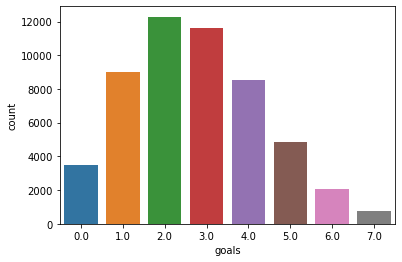

In [24]:
sns.countplot(df['goals'])
plt.show()

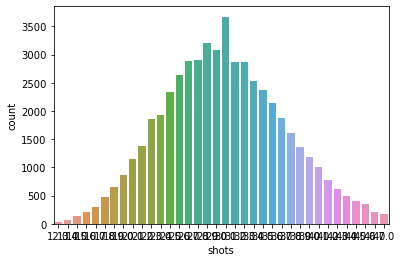

In [25]:
sns.countplot(df['shots'])
plt.show()

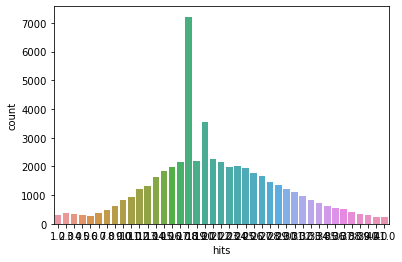

In [26]:
sns.countplot(df['hits'])
plt.show()

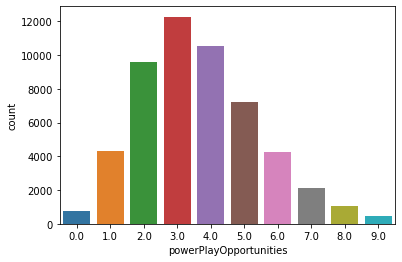

In [27]:
sns.countplot(df['powerPlayOpportunities'])
plt.show()

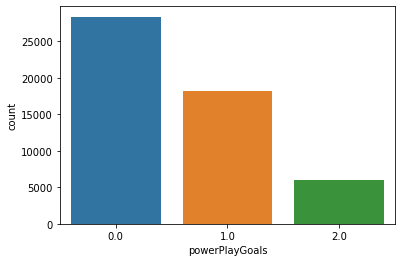

In [28]:
sns.countplot(df['powerPlayGoals'])
plt.show()

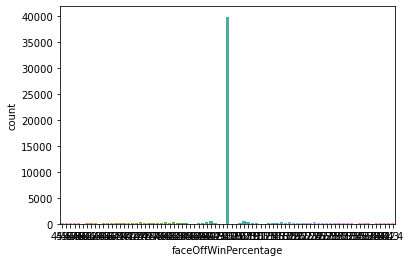

In [29]:
sns.countplot(df['faceOffWinPercentage'])
plt.show()

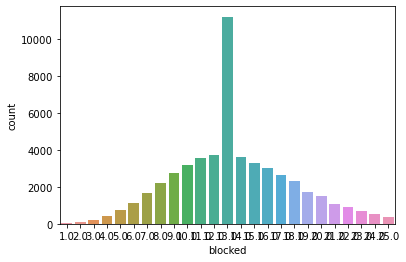

In [30]:
sns.countplot(df['blocked'])
plt.show()

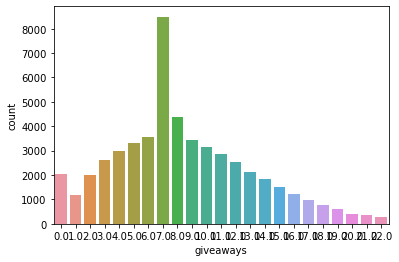

In [31]:
sns.countplot(df['giveaways'])
plt.show()

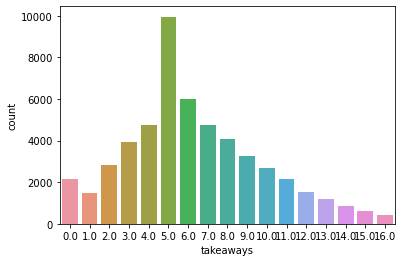

In [32]:
sns.countplot(df['takeaways'])
plt.show()

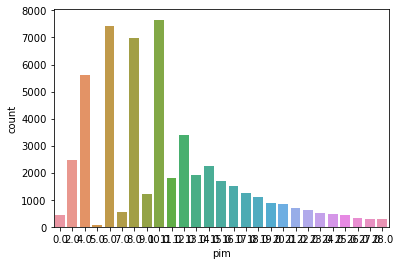

In [33]:
sns.countplot(df['pim'])
plt.show()

## KDE plot:

<AxesSubplot:xlabel='goals', ylabel='Density'>

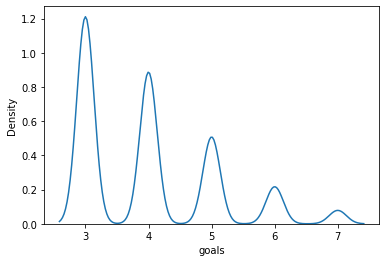

In [34]:
sns.kdeplot(df.query('goals > 2').goals)

## Distplot:

<AxesSubplot:xlabel='goals', ylabel='Density'>

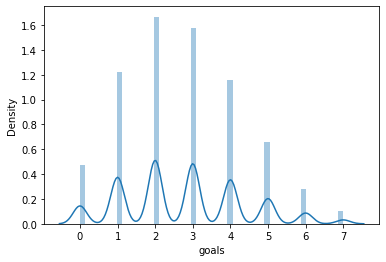

In [35]:
sns.distplot(df['goals'])

game_id                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
team_id                    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
shots                      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
hits                       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
pim                          AxesSubplot(0.125,0.518913;0.168478x0.16413)
powerPlayOpportunities    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
powerPlayGoals            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
faceOffWinPercentage      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
giveaways                    AxesSubplot(0.125,0.321957;0.168478x0.16413)
takeaways                 AxesSubplot(0.327174,0.321957;0.168478x0.16413)
blocked                   AxesSubplot(0.529348,0.321957;0.168478x0.16413)
goals                     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

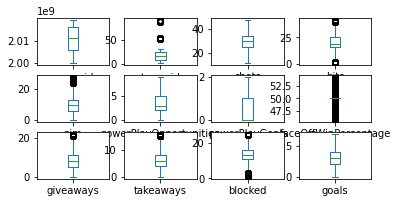

In [36]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

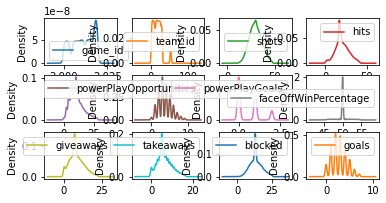

In [37]:
df.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

## Histogram

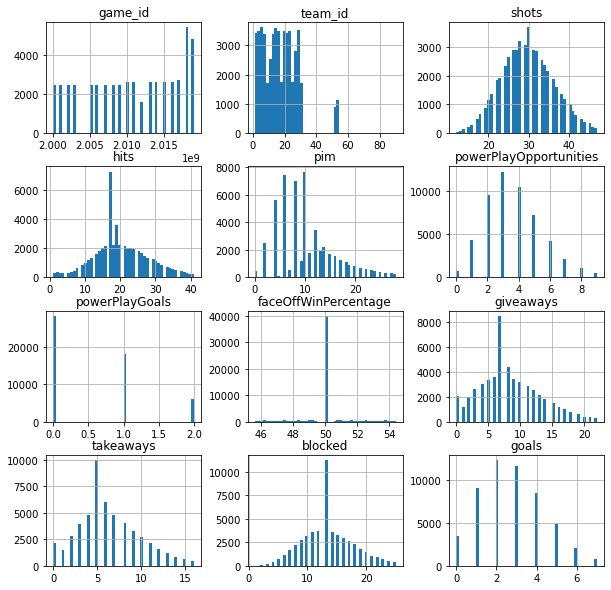

In [38]:
df.hist(figsize=(10,10),bins=50)
plt.show()

## Checking for Multicollinearity

## Heatmap for expressing correlation

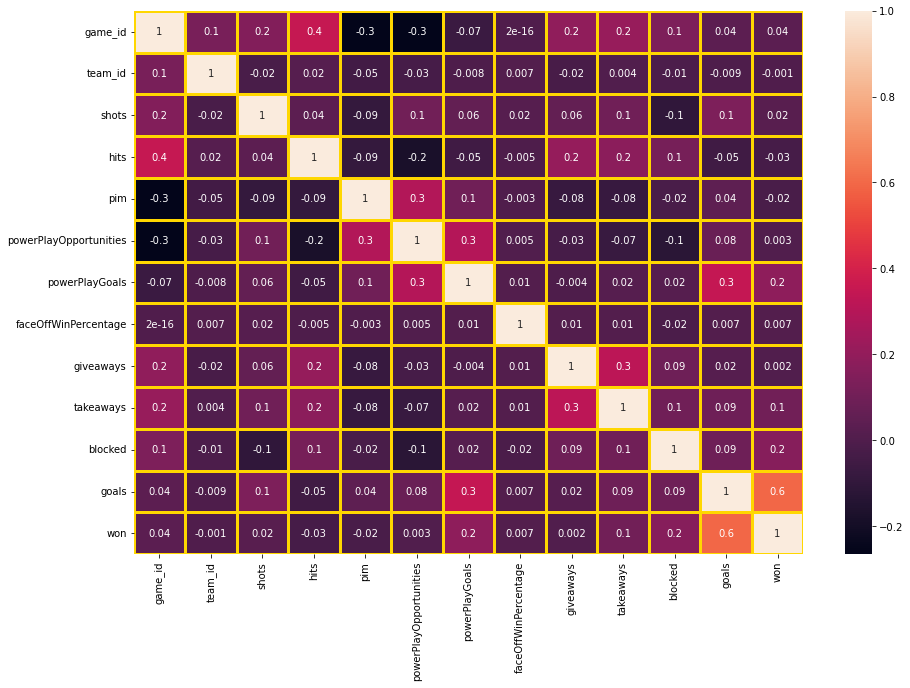

In [39]:
plt.figure(figsize =(15,10))
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor='gold',annot=True);

### Dropping columns that doesn't affect the output variable

In [40]:
df.drop(df.columns[[0,1,4]], axis = 1, inplace = True)

In [41]:
df

,HoA,settled_in,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,goals,won
0,away,REG,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,4.0,False
1,home,REG,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,7.0,True
2,away,OT,34.0,16.0,6.0,3.0,1.0,50.0,7.0,4.0,14.0,right,4.0,True
3,home,OT,33.0,17.0,8.0,2.0,1.0,50.0,5.0,6.0,14.0,right,3.0,False
4,away,REG,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52605,home,REG,29.0,29.0,20.0,4.0,0.0,50.0,12.0,11.0,9.0,right,1.0,False
52606,away,REG,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,right,4.0,True
52607,home,REG,33.0,28.0,0.0,1.0,0.0,51.0,13.0,6.0,7.0,right,1.0,False
52608,away,REG,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,right,4.0,True


### One-Hot Encoding categorical variables in columns that affect the output variable

In [42]:
df = pd.get_dummies(df, columns = ['HoA','settled_in','startRinkSide','won'], drop_first = True)

In [43]:
df

,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,goals,HoA_home,settled_in_REG,settled_in_tbc,startRinkSide_right,won_True
0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,4.0,0,1,0,0,0
1,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,7.0,1,1,0,0,1
2,34.0,16.0,6.0,3.0,1.0,50.0,7.0,4.0,14.0,4.0,0,0,0,1,1
3,33.0,17.0,8.0,2.0,1.0,50.0,5.0,6.0,14.0,3.0,1,0,0,1,0
4,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,4.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52605,29.0,29.0,20.0,4.0,0.0,50.0,12.0,11.0,9.0,1.0,1,1,0,1,0
52606,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,4.0,0,1,0,1,1
52607,33.0,28.0,0.0,1.0,0.0,51.0,13.0,6.0,7.0,1.0,1,1,0,1,0
52608,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,4.0,0,1,0,1,1


## Model selection and building

### Splitting the X and Y values

In [44]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Splitting training and testing data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling (It is done to bring values of all the colums to same scale)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.03978008  0.61089871  0.81995067 ...  0.55250034 -0.02966284
  -0.89404951]
 [-0.57780166  2.27350101  1.17214649 ...  0.55250034 -0.02966284
  -0.89404951]
 [-0.57780166  0.86668368 -1.11712635 ...  0.55250034 -0.02966284
  -0.89404951]
 ...
 [-0.88659253  0.22722126 -0.76493053 ... -1.80995363 -0.02966284
  -0.89404951]
 [ 1.73812987 -0.66802613 -1.46932217 ...  0.55250034 -0.02966284
   1.11850629]
 [-1.6585697   0.86668368  0.46775484 ... -1.80995363 -0.02966284
   1.11850629]]
[[ 0.50296639  0.48300623 -1.11712635 ... -1.80995363 -0.02966284
   1.11850629]
 [ 0.81175726 -0.41224116 -1.11712635 ...  0.55250034 -0.02966284
  -0.89404951]
 [ 0.19417552 -0.41224116 -1.46932217 ...  0.55250034 -0.02966284
   1.11850629]
 ...
 [-1.04098796 -0.66802613  0.99604858 ...  0.55250034 -0.02966284
  -0.89404951]
 [ 0.65736182  0.7387912   0.11555902 ...  0.55250034 -0.02966284
   1.11850629]
 [ 0.03978008 -1.81905849 -0.06053889 ... -1.80995363 -0.02966284
  -0.89404951]]


## Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
lr.intercept_

0.48586295381106304

In [61]:
lr.coef_

array([-0.02815347, -0.0094485 , -0.02300477, -0.00486172, -0.00717936,
        0.00182115, -0.02108113,  0.02149878,  0.05034451,  0.29774932,
        0.02993938,  0.01464303, -0.00432778,  0.00597356])

In [62]:
y_pred = lr.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [68]:
mean_absolute_error(y_test, y_pred)

0.33332926315114386

In [69]:
mean_squared_error(y_test, y_pred)

0.15717452342453142

In [70]:
r2_score(y_test, y_pred)

0.3712517256939514

In [71]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  0.39645242264934066


## DecisionTreeRegressor

In [72]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [73]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [74]:
dt_y_pred = regressor.predict(X_test)

In [75]:
mean_absolute_error(y_test, dt_y_pred)

0.24762402585059876

In [76]:
mean_squared_error(y_test, dt_y_pred)

0.24745770766014066

In [77]:
r2_score(y_test, dt_y_pred)

0.010090164327737239

In [78]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  0.4974512113364894


## Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0) 

In [80]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [81]:
rf_y_pred = RFregressor.predict(X_test)

In [82]:
mean_absolute_error(y_test, rf_y_pred)

0.26707570306206496

In [83]:
mean_squared_error(y_test, rf_y_pred)

0.1327222332880659

In [84]:
r2_score(y_test, rf_y_pred)

0.4690686930443605

In [85]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  0.36431062747065984


In [87]:
results = pd.DataFrame({
    'Model': ['Linear Regression','DecisionTreeRegressor', 'Random Forest Regressor'],
    'Score': [0.396,0.497,0.364]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.497,DecisionTreeRegressor
0.396,Linear Regression
0.364,Random Forest Regressor


In [88]:
#Observation:

#DecisionTreeRegressor performs well than other models

#Hence I will use DecisionTreeRegressor for training my model.